<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Student 1:</b> CANALE 
<b> Student 2:</b> ELLENA
 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
from __future__ import print_function
import tensorflow as tf


#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  01   =====> Loss= 1.286880517
Epoch:  02   =====> Loss= 0.731984088
Epoch:  03   =====> Loss= 0.600053700
Epoch:  04   =====> Loss= 0.536617899
Epoch:  05   =====> Loss= 0.497729340
Epoch:  06   =====> Loss= 0.470953372
Epoch:  07   =====> Loss= 0.451454671
Epoch:  08   =====> Loss= 0.436050117
Epoch:  09   =====> Loss= 0.423322550
Epoch:  10   =====> Loss= 0.413169499
Epoch:  11   =====> Loss= 0.404188006
Epoch:  12   =====> Loss= 0.396906343
Epoch:  13   =====> Loss= 0.390203831
Epoch:  14   =====> Loss= 0.384435246
Epoch:  15   =====> Loss= 0.379411392
Epoch:  16   =====> Loss= 0.374507659
Epoch:  17   =====> Loss= 0.370433932
Epoch:  18   =====> Loss= 0.366441450
Epoch:  19   =====> Loss= 0.362923098
Epoch:  20   =====> Loss= 0.359755657
Epoch:  21   =====> Loss= 0.356627841
Epoch:  22   =====> Loss= 0.353912697
Epoch:  23   =====> Loss= 0.350857394
Epoch:  24   =====> Loss= 0.348639083
Epoch:  25   =====> Loss= 0.346385159
Epoch:  26   =====> Loss= 0.344261822
Epoch:  27  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir= log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

One you are now familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>





The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs. **Activation.** softmax


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [2]:
#Helper functions  for weigths and bias initilization 
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [3]:
# https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
# https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

def LeNet5_Model(data,activation_function=tf.nn.sigmoid):

    # layer 1 param
    conv1_weights = weight_variable([5,5,1,6])
    conv1_bias = bias_variable([6])
    
    # layer 2 param
    conv2_weights = weight_variable([5,5,6,16])
    conv2_bias = bias_variable([16])
    
    # layer 3 param
    layer3_weights = weight_variable([400, 120])
    layer3_bias = bias_variable([120])
    
    # layer 4 param
    layer4_weights = weight_variable([120, 84])
    layer4_bias = bias_variable([84])
    
    # layer 5 param
    layer5_weights = weight_variable([84, 10])
    layer5_bias = bias_variable([10])
    
    
    with tf.name_scope('Model'):
        with tf.name_scope('Layer1'):
            conv1 = tf.nn.conv2d(input=data,filter=conv1_weights,strides=[1,1,1,1],padding='SAME')
            print(conv1.shape)
            sigmoid1 = activation_function(conv1 + conv1_bias)
            pool1 = tf.nn.max_pool(sigmoid1,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='VALID')
            print(pool1.shape)
            
        with tf.name_scope('Layer2'):
            conv2 = tf.nn.conv2d(input=pool1,filter=conv2_weights,strides=[1,1,1,1],padding='VALID')
            print(conv2.shape)
            sigmoid2 = activation_function(conv2 + conv2_bias)
            pool2 = tf.nn.max_pool(sigmoid2,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='VALID')   
            print(pool2.shape)
        
        with tf.name_scope('Flatten'):
            flat_inputs = tf.contrib.layers.flatten(pool2)
            print(flat_inputs.shape)
           
        with tf.name_scope('Layer3'):
            out3 = activation_function(tf.matmul(flat_inputs, layer3_weights) + layer3_bias)
            
        with tf.name_scope('Layer4'):
            out4 = activation_function(tf.matmul(out3, layer4_weights) + layer4_bias)
            
        with tf.name_scope('Layer5'):
            pred = tf.nn.softmax(tf.matmul(out4, layer5_weights) + layer5_bias) # Softmax
        return pred


<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

In [13]:
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
    print(shape)
    variable_parametes = 1
    for dim in shape:
        variable_parametes *= dim.value
    print(variable_parametes)
    total_parameters += variable_parametes
print(total_parameters)

(5, 5, 1, 6)
150
(6,)
6
(5, 5, 6, 16)
2400
(16,)
16
(400, 120)
48000
(120,)
120
(120, 84)
10080
(84,)
84
(84, 10)
840
(10,)
10
61706


In [15]:
layer1 = 5*5*1*6 + 6
layer2 = 5*5*6*16 + 16
layer3 = 400*120 + 120
layer4 = 120*84 + 84
layer5 = 84*10 + 10
tot = layer1 + layer2 + layer3 + layer4 + layer5
print('total number of parameters: %d' % tot)

total number of parameters: 61706


 Your answer goes here in details 

<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate =0.1
     Loss Fucntion : Cross entropy
     Optimisateur: SGD
     Number of training iterations= 100
     The batch size =128

In [18]:
from __future__ import print_function
import tensorflow as tf
from numpy import array
import numpy as np
#STEP 1
tf.reset_default_graph()

# Parameters
learning_rate = 0.1
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [batch_size,28, 28,1], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [batch_size, 10], name='LabelData')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = LeNet5_Model(data=x)
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            batch_xs = array(batch_xs).reshape(batch_size, 28,28,1)
            #print(batch_xs.shape)
            #print(batch_xs.dtype)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

(128, 28, 28, 6)
(128, 14, 14, 6)
(128, 10, 10, 16)
(128, 5, 5, 16)
(128, 400)
Epoch:  01   =====> Loss= 2.306496096
Epoch:  02   =====> Loss= 2.305118391
Epoch:  03   =====> Loss= 2.304803859
Epoch:  04   =====> Loss= 2.303603085
Epoch:  05   =====> Loss= 2.302692528
Epoch:  06   =====> Loss= 2.301137964
Epoch:  07   =====> Loss= 2.296393236
Epoch:  08   =====> Loss= 2.276063018
Epoch:  09   =====> Loss= 1.980490430
Epoch:  10   =====> Loss= 1.061656557
Epoch:  11   =====> Loss= 0.673400137
Epoch:  12   =====> Loss= 0.457144566
Epoch:  13   =====> Loss= 0.350934934
Epoch:  14   =====> Loss= 0.285083193
Epoch:  15   =====> Loss= 0.246945218
Epoch:  16   =====> Loss= 0.216544041
Epoch:  17   =====> Loss= 0.191632318
Epoch:  18   =====> Loss= 0.175332371
Epoch:  19   =====> Loss= 0.161357922
Epoch:  20   =====> Loss= 0.148372099
Epoch:  21   =====> Loss= 0.134611330
Epoch:  22   =====> Loss= 0.130380134
Epoch:  23   =====> Loss= 0.120058484
Epoch:  24   =====> Loss= 0.112938234
Epoch:  2

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [4]:
def evaluate(model, y):
    #your implementation goes here
    correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

    return accuracy

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [5]:
import numpy as np 
# Initializing the variables
def train(learning_rate, training_epochs, batch_size, display_step, optimizer_method=tf.train.GradientDescentOptimizer,activation_function=tf.nn.sigmoid):
    tf.reset_default_graph()
    # Initializing the session 
    
    logs_path = 'log_files/'  # useful for tensorboard

    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None,28, 28,1], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(data=x,activation_function=activation_function)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
                # Minimize error using cross entropy
        if activation_function == tf.nn.sigmoid:
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        else:    
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(tf.clip_by_value(pred,-1.0,1.0)), reduction_indices=1))
            #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = optimizer_method(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)

        
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()

    saver = tf.train.Saver()
    
    print ("Start Training!")
    t0 = time()
    X_train,Y_train = mnist.train.images.reshape((-1,28,28,1)), mnist.train.labels
    X_val,Y_val = mnist.validation.images.reshape((-1,28,28,1)), mnist.validation.labels
    
    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)

            # Loop over all batches
            for i in range(total_batch):
                # train_next_batch shuffle the images by default
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                batch_xs = batch_xs.reshape((-1,28,28,1))

                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, 
                                                    y: batch_ys})
                
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
                

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "=====> Loss=", "{:.9f}".format(avg_cost))
                                                
                acc_train = acc.eval({x: X_train, y: Y_train})
                print("Epoch: ", '%02d' % (epoch+1), "=====> Accuracy Train=", "{:.9f}".format(acc_train))
                
                acc_val = acc.eval({x: X_val, y: Y_val})
                print("Epoch: ", '%02d' % (epoch+1), "=====> Accuracy Validation=", "{:.9f}".format(acc_val))
        print ("Training Finished!")
        t1 = time()
        # Save the variables to disk.
        save_path = saver.save(sess, "model.ckpt")
        print("Model saved in file: %s" % save_path)

        #Your implementation for testing accuracy after training goes here
        
        X_test,Y_test = mnist.test.images.reshape((-1,28,28,1)),mnist.test.labels

        acc_test = acc.eval({x: X_test, y: Y_test})
        print("Accuracy Test=", "{:.9f}".format(acc_test))
        
        return acc_train,acc_val,acc_test,t1-t0


In [87]:
%time train (0.1,100,128,10,optimizer_method=tf.train.GradientDescentOptimizer)

(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
Start Training!
Epoch:  10  TOTAL  =====> Loss= 2.098373385
Epoch:  10  TOTAL  =====> Accuracy Train= 0.409581810
Epoch:  10  TOTAL  =====> Accuracy Validation= 0.407400012
Epoch:  20  TOTAL  =====> Loss= 0.165306511
Epoch:  20  TOTAL  =====> Accuracy Train= 0.953509092
Epoch:  20  TOTAL  =====> Accuracy Validation= 0.957799971
Epoch:  30  TOTAL  =====> Loss= 0.094643849
Epoch:  30  TOTAL  =====> Accuracy Train= 0.972872734
Epoch:  30  TOTAL  =====> Accuracy Validation= 0.972400010
Epoch:  40  TOTAL  =====> Loss= 0.068466610
Epoch:  40  TOTAL  =====> Accuracy Train= 0.977836370
Epoch:  40  TOTAL  =====> Accuracy Validation= 0.977400005
Epoch:  50  TOTAL  =====> Loss= 0.056492984
Epoch:  50  TOTAL  =====> Accuracy Train= 0.983418167
Epoch:  50  TOTAL  =====> Accuracy Validation= 0.980199993
Epoch:  60  TOTAL  =====> Loss= 0.047570020
Epoch:  60  TOTAL  =====> Accuracy Train= 0.986472726
Epoch:  60  TOTAL  =====> Accura

(0.99220002, 0.98680001, 0.9867, 2137.679314851761)

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

<img src="graph_run.png">
<img src="loss1.png">
<img src="accuracy1.png">

## Comment:
Here we see how the accuracy rapidly increases after few epochs and then increases at an always slower rate. Regarding the accuracy, we see that it gets always nearer to zero epoch after epoch.
From the graph we can have a confirm of our network architecture.

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a Relu :

- Retrain your network with SGD and AdamOptimizer and then fill the table above  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: | ---------:   
| Validation Accuracy  |0.99180001|0.097599998|      
| Testing Accuracy     |0.99089998|0.1032|       
| Training Time        |36min|36min|  |  


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








## Comment:
- Relu: when we use the relu we need to change the cost function, in fact we need to do gradient clipping otherwise our network will crash.
- The Adam optimizer gives very bad results when used with high learning rate, in fact it works better with a low learning rate, such as 0.001
- When we use the stocastic gradient descent with the relu we obtain really good results: more than 99% test accuracy. So we could stop here.

In [6]:
from time import time

In [14]:

%time train (0.1,100,128,10,optimizer_method=tf.train.GradientDescentOptimizer,activation_function=tf.nn.relu)


(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
Start Training!
('Epoch: ', '10', ' TOTAL  =====> Loss=', '0.022426698')
('Epoch: ', '10', ' TOTAL  =====> Accuracy Train=', '0.993163645')
('Epoch: ', '10', ' TOTAL  =====> Accuracy Validation=', '0.989000022')
('Epoch: ', '20', ' TOTAL  =====> Loss=', '0.006640168')
('Epoch: ', '20', ' TOTAL  =====> Accuracy Train=', '0.998363614')
('Epoch: ', '20', ' TOTAL  =====> Accuracy Validation=', '0.990400016')
('Epoch: ', '30', ' TOTAL  =====> Loss=', '0.001571395')
('Epoch: ', '30', ' TOTAL  =====> Accuracy Train=', '0.999836385')
('Epoch: ', '30', ' TOTAL  =====> Accuracy Validation=', '0.991400003')
('Epoch: ', '40', ' TOTAL  =====> Loss=', '0.005297473')
('Epoch: ', '40', ' TOTAL  =====> Accuracy Train=', '0.999490917')
('Epoch: ', '40', ' TOTAL  =====> Accuracy Validation=', '0.989799976')
('Epoch: ', '50', ' TOTAL  =====> Loss=', '0.000140374')
('Epoch: ', '50', ' TOTAL  =====> Accuracy Train=', '0.999981821')
('Epoch

(0.99998182, 0.99180001, 0.99089998, 2172.412855863571)

In [15]:
%time train (0.1,100,128,10,optimizer_method=tf.train.AdamOptimizer,activation_function=tf.nn.relu)

(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
Start Training!
('Epoch: ', '10', ' TOTAL  =====> Loss=', '16.597466315')
('Epoch: ', '10', ' TOTAL  =====> Accuracy Train=', '0.099454544')
('Epoch: ', '10', ' TOTAL  =====> Accuracy Validation=', '0.097599998')
('Epoch: ', '20', ' TOTAL  =====> Loss=', '16.558553229')
('Epoch: ', '20', ' TOTAL  =====> Accuracy Train=', '0.099454544')
('Epoch: ', '20', ' TOTAL  =====> Accuracy Validation=', '0.097599998')
('Epoch: ', '30', ' TOTAL  =====> Loss=', '16.557546838')
('Epoch: ', '30', ' TOTAL  =====> Accuracy Train=', '0.099454544')
('Epoch: ', '30', ' TOTAL  =====> Accuracy Validation=', '0.097599998')
('Epoch: ', '40', ' TOTAL  =====> Loss=', '16.589079859')
('Epoch: ', '40', ' TOTAL  =====> Accuracy Train=', '0.099454544')
('Epoch: ', '40', ' TOTAL  =====> Accuracy Validation=', '0.097599998')
('Epoch: ', '50', ' TOTAL  =====> Loss=', '16.595118102')
('Epoch: ', '50', ' TOTAL  =====> Accuracy Train=', '0.099454544')
('

(0.099454544, 0.097599998, 0.1032, 2185.8693709373474)

In [7]:
# your answer goas here

columns = ['optimizer','learning_rate','activation_function','batch_size','training_accuracy','validation_accuracy','test_accuracy','elapsed_time']
optimizer_options = {'gradient_descent':tf.train.GradientDescentOptimizer,'adam':tf.train.AdamOptimizer}
learning_options = [0.001,0.0001]
activation_options = {'sigmoid':tf.nn.sigmoid,'relu':tf.nn.relu}
batch_options = [50,128]

final_results = []
for optimizer_label in optimizer_options:
    optimizer = optimizer_options[optimizer_label]
    for learning_rate in learning_options:
        for activation_label in activation_options:
            activation_function = activation_options[activation_label]
            for batch_size in batch_options:
                #TO DEFINE TrainAndTest
                training_accuracy,validation_accuracy,test_accuracy,elapsed_time = train(
                    learning_rate = learning_rate,
                    training_epochs=100,
                    batch_size = batch_size,
                    display_step = 10,
                    optimizer_method = optimizer,
                    activation_function = activation_function
                )
                obj_test = {'optimizer':optimizer_label,
                        'learning_rate':learning_rate,
                        'activation_function':activation_label,
                        'batch_size':batch_size,
                        'training_accuracy':training_accuracy,
                        'validation_accuracy':training_accuracy,
                        'test_accuracy':test_accuracy,
                        'elapsed_time': elapsed_time
                       }
            

                final_results.append(obj_test)

(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
Start Training!
('Epoch: ', '10', '=====> Loss=', '0.013496247')
('Epoch: ', '10', '=====> Accuracy Train=', '0.995527267')
('Epoch: ', '10', '=====> Accuracy Validation=', '0.989600003')
('Epoch: ', '20', '=====> Loss=', '0.006858599')
('Epoch: ', '20', '=====> Accuracy Train=', '0.999272704')
('Epoch: ', '20', '=====> Accuracy Validation=', '0.991199970')
('Epoch: ', '30', '=====> Loss=', '0.005198982')
('Epoch: ', '30', '=====> Accuracy Train=', '0.998963654')
('Epoch: ', '30', '=====> Accuracy Validation=', '0.992399991')
('Epoch: ', '40', '=====> Loss=', '0.006224660')
('Epoch: ', '40', '=====> Accuracy Train=', '0.998654544')
('Epoch: ', '40', '=====> Accuracy Validation=', '0.990999997')
('Epoch: ', '50', '=====> Loss=', '0.005244983')
('Epoch: ', '50', '=====> Accuracy Train=', '0.998981833')
('Epoch: ', '50', '=====> Accuracy Validation=', '0.988200009')
('Epoch: ', '60', '=====> Loss=', '0.002950049')
('Epoc

In [9]:
final_results

[{'activation_function': 'relu',
  'batch_size': 50,
  'elapsed_time': 2719.1444079875946,
  'learning_rate': 0.001,
  'optimizer': 'adam',
  'test_accuracy': 0.98979998,
  'training_accuracy': 0.99956363,
  'validation_accuracy': 0.99956363},
 {'activation_function': 'relu',
  'batch_size': 128,
  'elapsed_time': 2140.7165479660034,
  'learning_rate': 0.001,
  'optimizer': 'adam',
  'test_accuracy': 0.99260002,
  'training_accuracy': 1.0,
  'validation_accuracy': 1.0},
 {'activation_function': 'sigmoid',
  'batch_size': 50,
  'elapsed_time': 2590.7476279735565,
  'learning_rate': 0.001,
  'optimizer': 'adam',
  'test_accuracy': 0.9903,
  'training_accuracy': 1.0,
  'validation_accuracy': 1.0},
 {'activation_function': 'sigmoid',
  'batch_size': 128,
  'elapsed_time': 2174.403846025467,
  'learning_rate': 0.001,
  'optimizer': 'adam',
  'test_accuracy': 0.98989999,
  'training_accuracy': 1.0,
  'validation_accuracy': 1.0},
 {'activation_function': 'relu',
  'batch_size': 50,
  'elapsed

## Comment
Here we have seen that the relu performs the best. Then, we also seen that the the sigmoid, combined with a low learning rate, takes an infinite amount of time to reach the optimum.

{'activation_function': 'relu',
<br>
  'batch_size': 128,
  <br>
  'elapsed_time': 2140.7165479660034,
  <br>
  'learning_rate': 0.001,
  <br>
  'optimizer': 'adam',
  <br>
  'test_accuracy': 0.99260002,
  <br>
  'training_accuracy': 1.0,
  <br>
  'validation_accuracy': 1.0},

Regarding the batch size, the best configuration (learning rate=0.001, adam optimizer) achieved a better result with a larger batch size. Generally, we have not seen great differences. The most important thing is that with a littler batch size we need more time to train.

Regarding the learning rate, we achieved the best result with a learning rate of 0.001, but also in this case the answer is not certain. The final accuracy depends from a combination of factors and we can't find something like a proportional behaviour.

Special cases: when we use the stocasthic gradient descent with a low learning rate and the sigmoid activation function, the accuracy is always really low.

As a general rule, the adam optimizer can achieve a better acuracy in a lower amount of time, but we need to take care of carefully choosing the learning rate.

In [23]:
with open('json.json','r') as input_fp:
    results = json.load(input_fp)

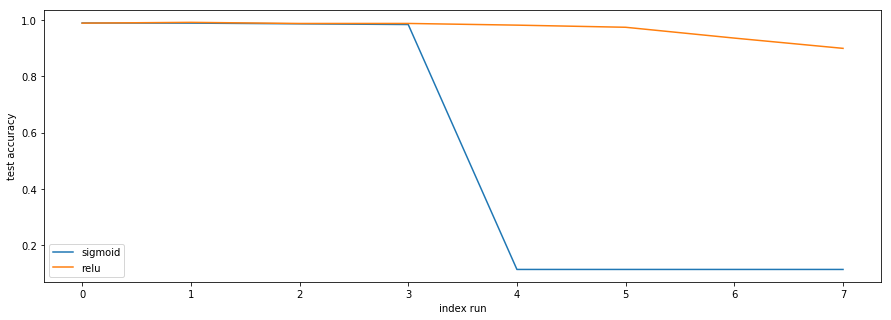

In [17]:
import matplotlib.pyplot as plt
sigmoid = [x for x in results if x['activation_function']=='sigmoid']
relu =[x for x in results if x['activation_function'] !='sigmoid']
plt.figure(figsize=(15,5))
plt.plot(range(len(sigmoid)),[x['test_accuracy'] for x in sigmoid])
plt.plot(range(len(sigmoid)),[x['test_accuracy'] for x in relu])
plt.legend(['sigmoid','relu'])
plt.ylabel('test accuracy')
plt.xlabel('index run')
plt.show()

The relu is always equal or better than the sigmoid

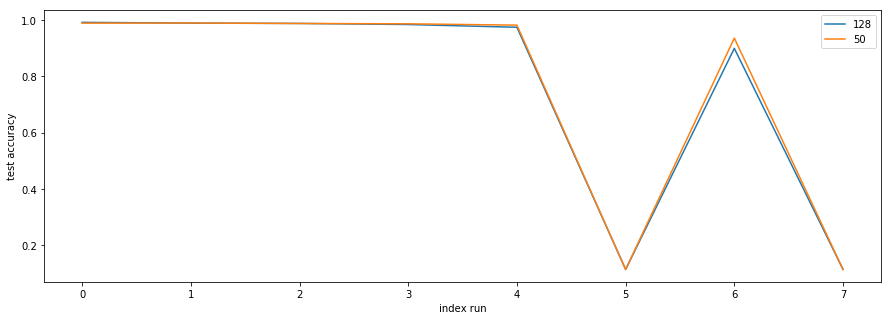

In [16]:
import matplotlib.pyplot as plt
a = [x for x in results if x['batch_size']== 128]
b =[x for x in results if x['batch_size'] !=128]
plt.figure(figsize=(15,5))
plt.plot(range(len(a)),[x['test_accuracy'] for x in a])
plt.plot(range(len(a)),[x['test_accuracy'] for x in b])
plt.legend(['128','50'])
plt.ylabel('test accuracy')
plt.xlabel('index run')
plt.show()

Test accuracy does not change when we change batch size

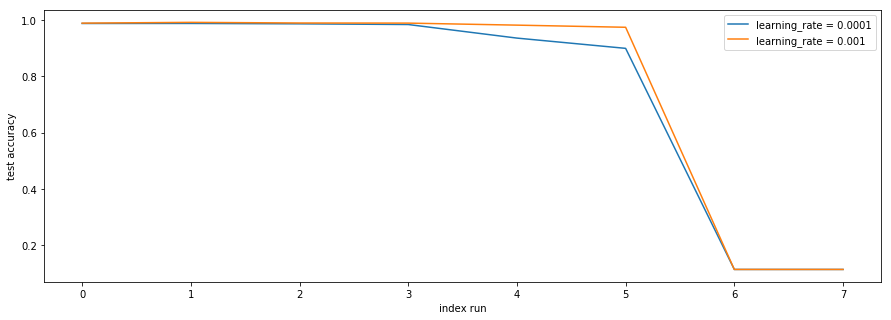

In [18]:
import matplotlib.pyplot as plt
a = [x for x in results if x['learning_rate']== 0.0001]
b =[x for x in results if x['learning_rate'] !=0.0001]
plt.figure(figsize=(15,5))
plt.plot(range(len(a)),[x['test_accuracy'] for x in a])
plt.plot(range(len(a)),[x['test_accuracy'] for x in b])
plt.legend(['learning_rate = 0.0001','learning_rate = 0.001'])
plt.ylabel('test accuracy')
plt.xlabel('index run')
plt.show()

An higher learning rate is better, in this specifi case. Later we will see that this is not always the case.

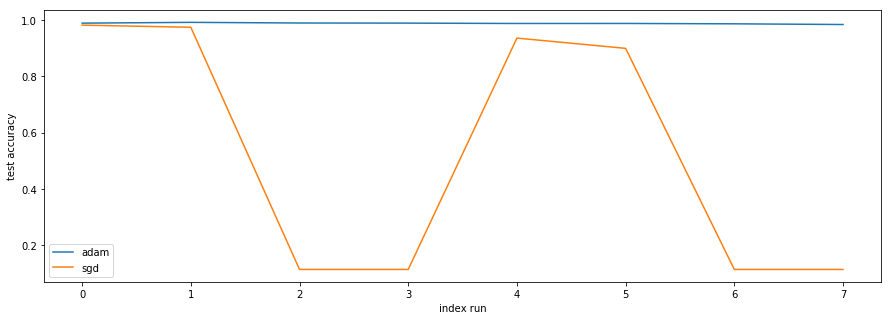

In [19]:
import matplotlib.pyplot as plt
a = [x for x in results if x['optimizer']== 'adam']
b =[x for x in results if x['optimizer'] != 'adam']
plt.figure(figsize=(15,5))
plt.plot(range(len(a)),[x['test_accuracy'] for x in a])
plt.plot(range(len(a)),[x['test_accuracy'] for x in b])
plt.legend(['adam','sgd'])
plt.ylabel('test accuracy')
plt.xlabel('index run')
plt.show()

Adam is always better than Stocasthic gradient descent

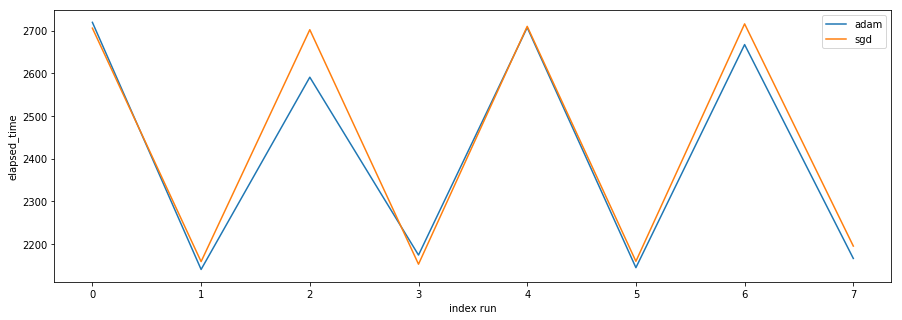

In [21]:
import matplotlib.pyplot as plt
a = [x for x in results if x['optimizer']== 'adam']
b =[x for x in results if x['optimizer'] != 'adam']
plt.figure(figsize=(15,5))
plt.plot(range(len(a)),[x['elapsed_time'] for x in a])
plt.plot(range(len(a)),[x['elapsed_time'] for x in b])
plt.legend(['adam','sgd'])
plt.ylabel('elapsed_time')
plt.xlabel('index run')
plt.show()

Sometimes adam is vaster than SGD

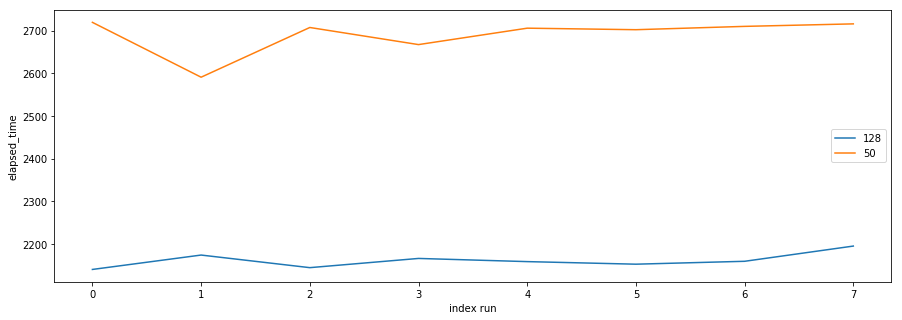

In [22]:
import matplotlib.pyplot as plt
a = [x for x in results if x['batch_size']== 128]
b =[x for x in results if x['batch_size'] !=128]
plt.figure(figsize=(15,5))
plt.plot(range(len(a)),[x['elapsed_time'] for x in a])
plt.plot(range(len(a)),[x['elapsed_time'] for x in b])
plt.legend(['128','50'])
plt.ylabel('elapsed_time')
plt.xlabel('index run')
plt.show()

Bigger batches mean less training time, this is actually a good news if we consider that the batch dimension does not has a big influence on the final accuracy

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully conntected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batsh size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

In [16]:
# https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
# https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

def LeNet5_Model(data,keep_prob,activation_function=tf.nn.sigmoid):

    # layer 1 param
    conv1_weights = weight_variable([5,5,1,6])
    conv1_bias = bias_variable([6])
    
    # layer 2 param
    conv2_weights = weight_variable([5,5,6,16])
    conv2_bias = bias_variable([16])
    
    # layer 3 param
    layer3_weights = weight_variable([400, 120])
    layer3_bias = bias_variable([120])
    
    # layer 4 param
    layer4_weights = weight_variable([120, 84])
    layer4_bias = bias_variable([84]) 
    
    # layer 5 param
    layer5_weights = weight_variable([84, 10])
    layer5_bias = bias_variable([10])
    
    
    with tf.name_scope('Model'):
        with tf.name_scope('Layer1'):
            conv1 = tf.nn.conv2d(input=data,filter=conv1_weights,strides=[1,1,1,1],padding='SAME')
            print(conv1.shape)
            sigmoid1 = activation_function(conv1 + conv1_bias)
            pool1 = tf.nn.max_pool(sigmoid1,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='VALID')
            print(pool1.shape)
            
        with tf.name_scope('Layer2'):
            conv2 = tf.nn.conv2d(input=pool1,filter=conv2_weights,strides=[1,1,1,1],padding='VALID')
            print(conv2.shape)
            sigmoid2 = activation_function(conv2 + conv2_bias)
            pool2 = tf.nn.max_pool(sigmoid2,ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1],padding='VALID')   
            print(pool2.shape)
        
        with tf.name_scope('Flatten'):
            flat_inputs = tf.contrib.layers.flatten(pool2)
            print(flat_inputs.shape)
           
        with tf.name_scope('Layer3'):
            out3 = activation_function(tf.matmul(flat_inputs, layer3_weights) + layer3_bias)
            
        with tf.name_scope('Layer4'):
            out4 = activation_function(tf.matmul(out3, layer4_weights) + layer4_bias)
            
        with tf.name_scope('Layer5'):
            out_drop = tf.nn.dropout(out4, keep_prob)
            pred = tf.nn.softmax(tf.matmul(out_drop, layer5_weights) + layer5_bias) # Softmax
        return pred


In [19]:
import numpy as np 
# Initializing the variables
def train(learning_rate, training_epochs, batch_size, display_step, optimizer_method=tf.train.GradientDescentOptimizer,activation_function=tf.nn.sigmoid):
    tf.reset_default_graph()
    # Initializing the session 
    
    logs_path = 'log_files/'  # useful for tensorboard

    # tf Graph Input:  mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None,28, 28,1], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    
    keep_prob = tf.placeholder(tf.float32)

    # Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
    with tf.name_scope('Model'):
        # Model
        pred = LeNet5_Model(x,keep_prob,activation_function=activation_function)
    with tf.name_scope('Loss'):
        # Minimize error using cross entropy
                # Minimize error using cross entropy
        if activation_function == tf.nn.sigmoid:
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        else:    
            cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(tf.clip_by_value(pred,-1.0,1.0)), reduction_indices=1))
            #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = optimizer_method(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy'):
        # Accuracy
        acc = evaluate(pred, y)

        
    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()

    saver = tf.train.Saver()
    
    print ("Start Training!")
    t0 = time()
    X_train,Y_train = mnist.train.images.reshape((-1,28,28,1)), mnist.train.labels
    X_val,Y_val = mnist.validation.images.reshape((-1,28,28,1)), mnist.validation.labels
    
    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)

            # Loop over all batches
            for i in range(total_batch):
                # train_next_batch shuffle the images by default
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                batch_xs = batch_xs.reshape((-1,28,28,1))

                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, 
                                                    y: batch_ys,keep_prob:0.75})
                
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
                

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), "=====> Loss=", "{:.9f}".format(avg_cost))
                                                
                acc_train = acc.eval({x: X_train, y: Y_train,keep_prob:1.0})
                print("Epoch: ", '%02d' % (epoch+1), "=====> Accuracy Train=", "{:.9f}".format(acc_train))
                
                acc_val = acc.eval({x: X_val, y: Y_val,keep_prob:1.0})
                print("Epoch: ", '%02d' % (epoch+1), "=====> Accuracy Validation=", "{:.9f}".format(acc_val))
        print ("Training Finished!")
        t1 = time()
        # Save the variables to disk.
        save_path = saver.save(sess, "model.ckpt")
        print("Model saved in file: %s" % save_path)

        #Your implementation for testing accuracy after training goes here
        
        X_test,Y_test = mnist.test.images.reshape((-1,28,28,1)),mnist.test.labels

        acc_test = acc.eval({x: X_test, y: Y_test,keep_prob:1.0})
        print("Accuracy Test=", "{:.9f}".format(acc_test))
        
        return acc_train,acc_val,acc_test,t1-t0


## Comment: 
Here we managed the keep_prob using a placeholder, in this way we can change it dynamically during our run.
We are also quite sure that we can achieve good performances with a limited number of epochs.

## Note: 
We have seen that using a learning rate = 0.001 is unstable, this behavior is even more visible when we add the dropout, thus we used a lower learning rate.
The adam optimizer uses an Adaptive Moment Estimation and with an high learning rate, combined with a big batch size can actually bring the network in a worse state. https://arxiv.org/pdf/1412.6980.pdf

In [21]:
train (0.0001,50,128,10,optimizer_method=tf.train.AdamOptimizer,activation_function=tf.nn.relu)

(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
Start Training!
('Epoch: ', '10', '=====> Loss=', '0.111174366')
('Epoch: ', '10', '=====> Accuracy Train=', '0.975127280')
('Epoch: ', '10', '=====> Accuracy Validation=', '0.978799999')
('Epoch: ', '20', '=====> Loss=', '0.065761882')
('Epoch: ', '20', '=====> Accuracy Train=', '0.985800028')
('Epoch: ', '20', '=====> Accuracy Validation=', '0.986599982')
('Epoch: ', '30', '=====> Loss=', '0.045343965')
('Epoch: ', '30', '=====> Accuracy Train=', '0.989909112')
('Epoch: ', '30', '=====> Accuracy Validation=', '0.987399995')
('Epoch: ', '40', '=====> Loss=', '0.033356651')
('Epoch: ', '40', '=====> Accuracy Train=', '0.993309081')
('Epoch: ', '40', '=====> Accuracy Validation=', '0.989600003')
('Epoch: ', '50', '=====> Loss=', '0.026213018')
('Epoch: ', '50', '=====> Accuracy Train=', '0.993218184')
('Epoch: ', '50', '=====> Accuracy Validation=', '0.988799989')
Training Finished!
Model saved in file: model.ckpt
('Ac

(0.99321818, 0.98879999, 0.98790002, 1117.6969571113586)

## Comment: 
Here after 50 epochs the result is not what we expected, we think that using the dropout we might actually need to use different parameters.

In [22]:
train (0.0001,50,50,10,optimizer_method=tf.train.AdamOptimizer,activation_function=tf.nn.relu)

(?, 28, 28, 6)
(?, 14, 14, 6)
(?, 10, 10, 16)
(?, 5, 5, 16)
(?, 400)
Start Training!
('Epoch: ', '10', '=====> Loss=', '0.084408194')
('Epoch: ', '10', '=====> Accuracy Train=', '0.980909109')
('Epoch: ', '10', '=====> Accuracy Validation=', '0.983600020')
('Epoch: ', '20', '=====> Loss=', '0.045053180')
('Epoch: ', '20', '=====> Accuracy Train=', '0.990272701')
('Epoch: ', '20', '=====> Accuracy Validation=', '0.989400029')
('Epoch: ', '30', '=====> Loss=', '0.027785825')
('Epoch: ', '30', '=====> Accuracy Train=', '0.994345427')
('Epoch: ', '30', '=====> Accuracy Validation=', '0.990599990')
('Epoch: ', '40', '=====> Loss=', '0.018642861')
('Epoch: ', '40', '=====> Accuracy Train=', '0.997072756')
('Epoch: ', '40', '=====> Accuracy Validation=', '0.992600024')
('Epoch: ', '50', '=====> Loss=', '0.013321549')
('Epoch: ', '50', '=====> Accuracy Train=', '0.998936391')
('Epoch: ', '50', '=====> Accuracy Validation=', '0.996999984')
Training Finished!
Model saved in file: model.ckpt
('Ac

(0.99893639, 0.99699998, 0.99070002, 1378.664743900299)

## Comment: 
We managed to obtain 99% accuracy score over the test set in 50 epochs, this is a really good result. This actually explain the idea of the adam optimizer, that using the concept of moment can improve the model in a short amount of time and a low learning rate. This, combined with the relu function allows us to achieve high accuracies.